
# **Statistical Modeling for Rain Prediction in Australia**


Hello and welcome! In this notebook, we are set to conduct an in-depth statistical analysis of the Rain in Australia dataset, conveniently available at https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package. This dataset encompasses a diverse set of variables, including meteorological factors like temperature, humidity, wind speed, and atmospheric pressure, among others. The primary focus is on the target variable, "RainTomorrow," which signifies whether it will rain tomorrow or not.

Our objective is to employ logistic regression to find the best model that reveals patterns within our dataset. Logistic regression is a valuable tool for binary classification problems, making it suitable for predicting whether it will rain based on various meteorological features. Let's proceed with the analysis to uncover insights and build an effective predictive model.





**Table of Content**

1.Importing Packages

2.Import the dataset

3.Data Perprocessing
* Handling Mising Values
* Handling Categorical Columns
* Dropping Unnecessary Columns

4.Optimal Logistic Regression Model Selection
* Model 1
* Model 2
* Compression of model 1 and model 2 using ANOVA
* Compression of model 1 and model 2 using AIC and BIC
* Best Model


# **1.Importing Packages**



In [23]:
# Load the packages
install.packages("dplyr")
install.packages("ggplot2")

library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **2.Import the dataset**

In [24]:
# Load the data
weatherAUS = read.csv("/content/sample_data/weatherAUS.csv")

str(weatherAUS)

'data.frame':	145460 obs. of  23 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Sunshine     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: int  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : int  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : int  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : int  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : int  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007

In [25]:
head(weatherAUS)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2,2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
3,2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
4,2008-12-04,Albury,9.2,28.0,0.0,NA,NA,NE,24,SE,⋯,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
5,2008-12-05,Albury,17.5,32.3,1.0,NA,NA,W,41,ENE,⋯,82,33,1010.8,1006.0,7,8,17.8,29.7,No,No
6,2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,⋯,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No


# **3.Data Perprocessing**

Data preprocessing is a crucial step in the data analysis pipeline, involving the cleaning and transformation of raw data into a format suitable for analysis. The specific steps involved in data preprocessing can vary based on the nature of the data and the goals of the analysis.





**Handling Missing Values**


In examining the weatherAUS dataset, a comprehensive evaluation for null values was conducted. The resulting summary provides a clear depiction of the count of missing values across each column.


In [26]:
# Check for null values in the weatherAUS dataset
missing_values <- colSums(is.na(weatherAUS))

# Display the count of null values for each column
print(missing_values)



         Date      Location       MinTemp       MaxTemp      Rainfall 
            0             0          1485          1261          3261 
  Evaporation      Sunshine   WindGustDir WindGustSpeed    WindDir9am 
        62790         69835         10326         10263         10566 
   WindDir3pm  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm 
         4228          1767          3062          2654          4507 
  Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am 
        15065         15028         55888         59358          1767 
      Temp3pm     RainToday  RainTomorrow 
         3609          3261          3267 


In the preprocessing steps, we have carefully handled missing values in our dataset. Notably, we chose not to impute or fill missing values in the target variable, 'RainTomorrow.' This decision is crucial as imputing the target variable could introduce biases and inaccuracies in our prediction.

In [27]:
# Drop rows with null values in the "RainTomorrow" column
weatherAUS <- weatherAUS[!is.na(weatherAUS$RainTomorrow), ]


# Drop rows with null values in the "RainToday" column
weatherAUS <- weatherAUS[!is.na(weatherAUS$RainToday), ]



In the process of preparing our weatherAUS dataset for analysis, we meticulously addressed missing values within numerical and categorical columns. For numerical features, the approach involved filling null values with the respective column mean, ensuring a representative replacement that preserves the statistical characteristics of the dataset. On the other hand, categorical columns underwent a similar treatment, with missing values being imputed using the mode, which represents the most frequently occurring category. This dual strategy of mean imputation for numerical features and mode imputation for categorical features ensures a balanced and accurate handling of missing data across diverse variable types.

In [28]:
# Identify numerical and categorical columns
numerical_columns <- sapply(weatherAUS, is.numeric)
categorical_columns <- sapply(weatherAUS, is.factor)

# Fill null values in numerical columns with mean
weatherAUS[, numerical_columns] <- lapply(weatherAUS[, numerical_columns], function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))

# Fill null values in categorical columns with mode
for (col in names(weatherAUS[, categorical_columns])) {
  mode_value <- names(sort(table(weatherAUS[[col]], useNA = "ifany"), decreasing = TRUE))[1]
  weatherAUS[[col]] <- ifelse(is.na(weatherAUS[[col]]), mode_value, weatherAUS[[col]])
}

In [29]:
# Check for null values in the weatherAUS dataset
missing_values <- colSums(is.na(weatherAUS))

# Display the count of null values for each column
print(missing_values)


         Date      Location       MinTemp       MaxTemp      Rainfall 
            0             0             0             0             0 
  Evaporation      Sunshine   WindGustDir WindGustSpeed    WindDir9am 
            0             0          9163             0          9660 
   WindDir3pm  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm 
         3670             0             0             0             0 
  Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am 
            0             0             0             0             0 
      Temp3pm     RainToday  RainTomorrow 
            0             0             0 



 **Handling Categorical Column**


We are using the mutate function from the dplyr package in R to convert the 'RainTomorrow' column in the 'weatherAUS' dataset into binary values. In this transformation, 'Yes' is represented as 1, while 'No' is represented as 0.

In [30]:
# Mutate the 'loan_status' column to binary values (1 for 'Yes', 0 for )
weatherAUS <- weatherAUS %>%
  mutate(RainTomorrow  = ifelse(RainTomorrow  == "Yes", 1, 0))

# Convert variables to factors
weatherAUS$RainTomorrow   <- as.factor(weatherAUS$RainTomorrow )


We are using the mutate function from the dplyr package in R to convert the 'RainToday' column in the 'weatherAUS' dataset into binary values. In this transformation, 'Yes' is represented as 1, while 'No' is represented as 0.

In [31]:
# Mutate the 'loan_status' column to binary values (1 for 'Yes', 0 for )
weatherAUS <- weatherAUS %>%
  mutate(RainToday = ifelse(RainToday == "Yes", 1, 0))

# Convert variables to factors
weatherAUS$RainToday  <- as.factor(weatherAUS$RainToday )

In [32]:
str(weatherAUS)

'data.frame':	140787 obs. of  23 variables:
 $ Date         : chr  "2008-12-01" "2008-12-02" "2008-12-03" "2008-12-04" ...
 $ Location     : chr  "Albury" "Albury" "Albury" "Albury" ...
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  5.47 5.47 5.47 5.47 5.47 ...
 $ Sunshine     : num  7.63 7.63 7.63 7.63 7.63 ...
 $ WindGustDir  : chr  "W" "WNW" "WSW" "NE" ...
 $ WindGustSpeed: num  44 44 46 24 41 56 50 35 80 28 ...
 $ WindDir9am   : chr  "W" "NNW" "W" "SE" ...
 $ WindDir3pm   : chr  "WNW" "WSW" "WSW" "E" ...
 $ WindSpeed9am : num  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : num  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : num  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : num  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009

**Dropping Unnecessary Columns**

The 'Date,' 'Location,' 'WindGustDir,' 'WindDir9am,' and 'WindDir3pm' columns have been excluded from the 'weatherAUS' dataset utilizing the select function from the dplyr package. This step is undertaken to remove extraneous variables not essential for a specific analysis. By doing so, the dimensionality of the dataset is reduced, enabling a more streamlined and focused dataset that emphasizes pertinent information.






In [33]:

# Dropping columns
weatherAUS <- weatherAUS %>%
  select(-Date, -Location,-WindGustDir,-WindDir9am,-WindDir3pm )

str(weatherAUS)


'data.frame':	140787 obs. of  18 variables:
 $ MinTemp      : num  13.4 7.4 12.9 9.2 17.5 14.6 14.3 7.7 9.7 13.1 ...
 $ MaxTemp      : num  22.9 25.1 25.7 28 32.3 29.7 25 26.7 31.9 30.1 ...
 $ Rainfall     : num  0.6 0 0 0 1 0.2 0 0 0 1.4 ...
 $ Evaporation  : num  5.47 5.47 5.47 5.47 5.47 ...
 $ Sunshine     : num  7.63 7.63 7.63 7.63 7.63 ...
 $ WindGustSpeed: num  44 44 46 24 41 56 50 35 80 28 ...
 $ WindSpeed9am : num  20 4 19 11 7 19 20 6 7 15 ...
 $ WindSpeed3pm : num  24 22 26 9 20 24 24 17 28 11 ...
 $ Humidity9am  : num  71 44 38 45 82 55 49 48 42 58 ...
 $ Humidity3pm  : num  22 25 30 16 33 23 19 19 9 27 ...
 $ Pressure9am  : num  1008 1011 1008 1018 1011 ...
 $ Pressure3pm  : num  1007 1008 1009 1013 1006 ...
 $ Cloud9am     : num  8 4.43 4.43 4.43 7 ...
 $ Cloud3pm     : num  4.5 4.5 2 4.5 8 ...
 $ Temp9am      : num  16.9 17.2 21 18.1 17.8 20.6 18.1 16.3 18.3 20.1 ...
 $ Temp3pm      : num  21.8 24.3 23.2 26.5 29.7 28.9 24.6 25.5 30.2 28.2 ...
 $ RainToday    : Factor w/ 2

In [34]:
head(weatherAUS)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,13.4,22.9,0.6,5.472516,7.63054,44,20,24,71,22,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
2,7.4,25.1,0.0,5.472516,7.63054,44,4,22,44,25,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
3,12.9,25.7,0.0,5.472516,7.63054,46,19,26,38,30,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
4,9.2,28.0,0.0,5.472516,7.63054,24,11,9,45,16,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
5,17.5,32.3,1.0,5.472516,7.63054,41,7,20,82,33,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
6,14.6,29.7,0.2,5.472516,7.63054,56,19,24,55,23,1009.2,1005.4,4.431161,4.49925,20.6,28.9,0,0


# **4.Optimal Logistic Regression Model Selection**

This section is dedicated to building a comprehensive regression model that incorporates all available numerical predictors and evaluating its performance. Subsequently, we will systematically exclude predictors demonstrating insignificance and reassess the model's effectiveness. Our ultimate aim is to pinpoint the most suitable model for this dataset.

To achieve this objective, we have employed Logistic Regression, a specialized technique within regression modeling tailored for binary outcomes, typically categorized as either "yes" or "no." The glm() method in R has been utilized for constructing our models, enabling us to examine the relationships between various numerical predictors and the binary outcome variable 'RainTomorrow.' This iterative process of inclusion and exclusion allows us to refine the model, identifying significant predictors and enhancing its predictive accuracy for the given dataset.





# **Model 1**

Model 1 is constructed to predict 'RainTomorrow' based on a comprehensive set of predictor variables. The logistic regression model (glm) is specified with the formula1, which includes predictors such as Humidity3pm, Cloud3pm, Cloud9am, RainToday, Humidity9am, Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, MinTemp, Temp9am, Evaporation, MaxTemp, Temp3pm, Pressure3pm, Pressure9am, and Sunshine.

**Result of Model 1:**
Within the framework of Model 1, the outcomes underscore the significance of individual predictors in influencing the binary outcome of rain tomorrow. Notably, variables like 'Humidity3pm,' 'Cloud3pm,' 'Rainfall,' 'WindGustSpeed,' 'Humidity9am,' and 'RainToday' exhibit positive coefficients and high significance levels (p < 0.001), indicating an increased likelihood of rain tomorrow when these factors are present. In contrast, variables such as 'WindSpeed9am,' 'WindSpeed3pm,' 'MinTemp,' 'MaxTemp,' 'Pressure3pm,' 'Pressure9am,' and 'Sunshine' possess negative coefficients and are highly significant (p < 0.001), suggesting a decreased likelihood of rain tomorrow associated with these factors. Meanwhile, 'MinTemp,' 'Cloud9am,' and 'Evaporation' were found to be statistically insignificant (p > 0.05) in this specific context.

This nuanced understanding provides valuable insights into the relative importance of various meteorological factors when predicting rainfall. Model 1's AIC is 100,499 , and the residual deviance is 100,463 ,contributing to the comprehensive evaluation of the model's performance and aiding in potential refinements for enhanced predictive accuracy.

In [35]:
# Model 1 : incuding all variles
formula1 <- RainTomorrow ~ Humidity3pm + Cloud3pm + Cloud9am + RainToday + Humidity9am + Rainfall + WindGustSpeed +
            WindSpeed9am + WindSpeed3pm + MinTemp + Temp9am + Evaporation + MaxTemp + Temp3pm + Pressure3pm + Pressure9am + Sunshine

model1 <- glm(formula1, data = weatherAUS, family = "binomial")
summary(model1)




Call:
glm(formula = formula1, family = "binomial", data = weatherAUS)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   57.7871766  1.4692755  39.330  < 2e-16 ***
Humidity3pm    0.0540045  0.0008432  64.044  < 2e-16 ***
Cloud3pm       0.1298975  0.0052681  24.657  < 2e-16 ***
Cloud9am       0.0008101  0.0048579   0.167 0.867558    
RainToday1     0.5682145  0.0214834  26.449  < 2e-16 ***
Humidity9am    0.0038799  0.0008362   4.640 3.49e-06 ***
Rainfall       0.0089434  0.0010987   8.140 3.96e-16 ***
WindGustSpeed  0.0526146  0.0008937  58.874  < 2e-16 ***
WindSpeed9am  -0.0108788  0.0012026  -9.046  < 2e-16 ***
WindSpeed3pm  -0.0232304  0.0012170 -19.089  < 2e-16 ***
MinTemp       -0.0049332  0.0039704  -1.243 0.214049    
Temp9am        0.0216769  0.0056334   3.848 0.000119 ***
Evaporation    0.0004243  0.0032672   0.130 0.896678    
MaxTemp       -0.0347615  0.0049044  -7.088 1.36e-12 ***
Temp3pm        0.0249540  0.0050411   4.950 7.42e-07 ***
Pr

# **Model 2**


In Model 2, we refined the model by excluding the statistically insignificant variables, namely 'MinTemp,' 'Cloud9am,' and 'Evaporation.' The resulting formula for Model 2 is outlined below. The outcomes of Model 2 underscore the pivotal importance and statistical significance of all included variables in predicting rain occurrences. Every variable in this model exhibits a high degree of statistical significance, with p-values consistently below 0.001. This robust statistical significance underscores the substantial contributions of each meteorological factor in determining the likelihood of rainfall. Furthermore, the AIC stands at 100,495, representing a measure of the model's goodness-of-fit, and the residual deviance is 100,465, providing insight into how well the model captures the observed variability in the data. Together, these metrics affirm the effectiveness and statistical significance of Model 2 in predicting rain outcomes.

In [36]:
# Model 2 and  Exclude MinTemp, Evaporation, Cloud9am
formula2 <- RainTomorrow ~ Humidity3pm + Cloud3pm  + RainToday + Humidity9am + Rainfall + WindGustSpeed +Temp3pm +
            WindSpeed9am + WindSpeed3pm + Temp9am  + MaxTemp + Pressure3pm + Pressure9am + Sunshine
model2 <- glm(formula2, data = weatherAUS, family = "binomial")
summary(model2)


Call:
glm(formula = formula2, family = "binomial", data = weatherAUS)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   57.7945366  1.4657211  39.431  < 2e-16 ***
Humidity3pm    0.0538995  0.0008387  64.269  < 2e-16 ***
Cloud3pm       0.1302364  0.0050084  26.004  < 2e-16 ***
RainToday1     0.5657787  0.0213370  26.516  < 2e-16 ***
Humidity9am    0.0035875  0.0007910   4.535 5.75e-06 ***
Rainfall       0.0089534  0.0010972   8.160 3.35e-16 ***
WindGustSpeed  0.0525833  0.0008917  58.967  < 2e-16 ***
Temp3pm        0.0245343  0.0050187   4.889 1.02e-06 ***
WindSpeed9am  -0.0111217  0.0011854  -9.382  < 2e-16 ***
WindSpeed3pm  -0.0231454  0.0012128 -19.084  < 2e-16 ***
Temp9am        0.0170586  0.0042201   4.042 5.29e-05 ***
MaxTemp       -0.0346194  0.0048744  -7.102 1.23e-12 ***
Pressure3pm   -0.1847305  0.0045975 -40.181  < 2e-16 ***
Pressure9am    0.1213803  0.0045592  26.623  < 2e-16 ***
Sunshine      -0.1184593  0.0035204 -33.649  < 2e-16 ***
--

# **Compression of model 1 and model 2 using ANOVA:**


The output represents the results of an analysis of variance (ANOVA) comparing Model 1 and Model 2 using a likelihood ratio test (LRT). Here's an interpretation of the table:

**Resid. Df (Residual Degrees of Freedom)**: Indicates the degrees of freedom associated with the residuals after fitting the models. For Model 1, it is 140,769, and for Model 2, it is 140,772.

**Resid. Dev (Residual Deviance):** Represents the deviance of the residuals, measuring the goodness of fit for each model. In Model 1, the residual deviance is 100,463.0, and in Model 2, it is 100,464.6.

**Df (Degrees of Freedom):** Indicates the difference in degrees of freedom between the two models. In this case, it is -3, implying a reduction in degrees of freedom from Model 1 to Model 2.

**Deviance**: Reflects the difference in deviance between the models. The value -1.545117 indicates a decrease in deviance when moving from Model 1 to Model 2.

**Pr(>Chi) (p-value):** Represents the p-value associated with the likelihood ratio test. In this scenario, the p-value is 0.6718971. This p-value helps assess whether the reduction in deviance (difference between models) is statistically significant. A higher p-value suggests that the difference is not significant.

In conclusion, the likelihood ratio test does not find a significant difference between Model 1 and Model 2, as indicated by the relatively high p-value (0.67). This suggests that the exclusion of the variables 'MinTemp,' 'Cloud9am,' and 'Evaporation' in Model 2 does not result in a significant loss of explanatory power compared to the more inclusive Model 1.

In [37]:
anova(model1,model2,test="LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,140769,100463.0,NA,NA,NA
2,140772,100464.6,-3,-1.545117,0.6718971


# **Compression of model 1 and model 2 using AIC and BIC:**


The R code calculates the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for Model 1 and Model 2. Here's a brief explanation of AIC and BIC and the output of the code:

**AIC (Akaike Information Criterion):** AIC is a measure that balances the goodness of fit of a statistical model with its complexity. It penalizes models for having more parameters. Lower AIC values indicate better-fitting models.

**BIC (Bayesian Information Criterion):** Similar to AIC, BIC penalizes models for complexity. However, BIC imposes a higher penalty for additional parameters, making it more stringent in selecting simpler models. Like AIC, lower BIC values indicate better-fitting models.

In this comparison, both AIC and BIC values are lower for Model 2 compared to Model 1. This suggests that Model 2 is a slightly better-fitting model according to these information criteria. However, it's important to consider other aspects of model selection and validation when determining the most suitable model for your specific analysis. Lower AIC and BIC values provide evidence for improved model fit, but the difference in these values between models should be interpreted cautiously, and additional analyses may be needed for a comprehensive model evaluation.







In [38]:
# Calculate AIC and BIC for Model 1
aic_model1 <- AIC(model1)
bic_model1 <- BIC(model1)

# Calculate AIC and BIC for Model 2
aic_model2 <- AIC(model2)
bic_model2 <- BIC(model2)

cat("Model 1:\n")
cat("AIC:", aic_model1, "\n")
cat("BIC:", bic_model1, "\n\n")

cat("Model 2:\n")
cat("AIC:", aic_model2, "\n")
cat("BIC:", bic_model2, "\n")

Model 1:
AIC: 100499 
BIC: 100676.4 

Model 2:
AIC: 100494.6 
BIC: 100642.4 


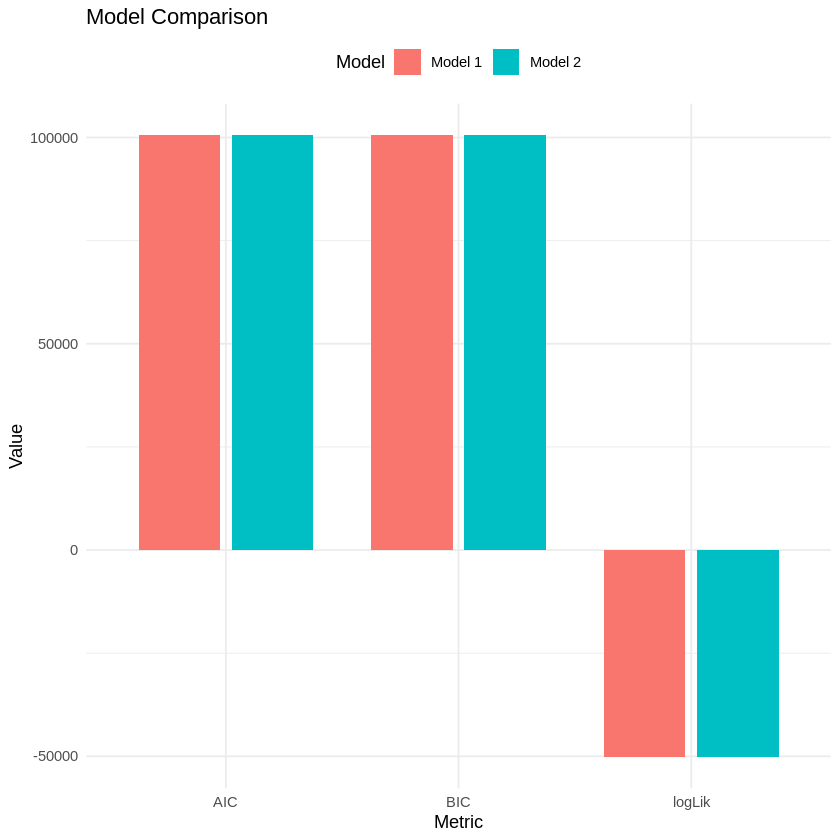

In [39]:
# Extract AIC, BIC, and log-likelihood values for both models
metrics <- c("AIC", "BIC", "logLik")
values_model1 <- c(AIC(model1), BIC(model1), logLik(model1))
values_model2 <- c(AIC(model2), BIC(model2), logLik(model2))

comparison_data <- data.frame(Metric = rep(metrics, 2),
                               Model = rep(c("Model 1", "Model 2"), each = length(metrics)),
                               Value = c(values_model1, values_model2))
# Create the side-by-side bar plot
ggplot(comparison_data, aes(x = Metric, y = Value, fill = Model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width = 0.7) +
  labs(title = "Model Comparison",
       y = "Value",
       x = "Metric",
       fill = "Model") +
  theme_minimal() +
  theme(legend.position = "top")

# **Best Model**

In conclusion, the likelihood ratio test suggests that excluding the variables 'MinTemp,' 'Cloud9am,' and 'Evaporation' in Model 2 does not result in a significant loss of explanatory power compared to the more inclusive Model 1, as indicated by a relatively high p-value of 0.67. Moreover, Model 2 emerges as a slightly better-fitting model based on lower Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values. While these metrics provide evidence for improved model fit, comprehensive model selection should consider various factors, including practical interpretability and the specific objectives of the analysis. Therefore, although Model 2 appears more parsimonious and effective, the decision on the best model necessitates a nuanced evaluation considering additional analyses and validation techniques for a thorough understanding of model performance.

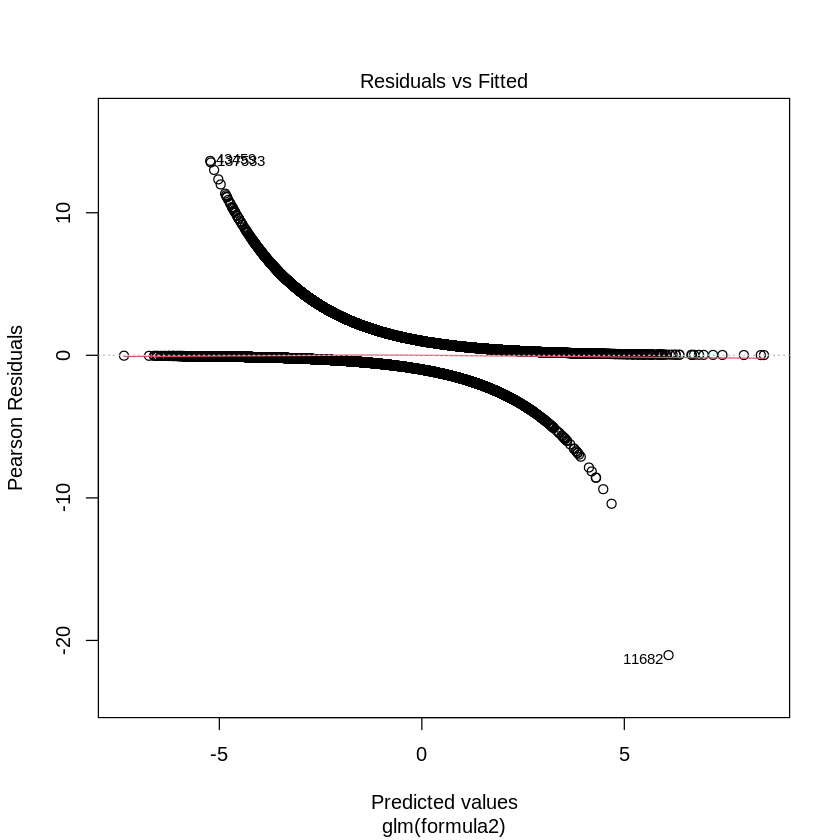

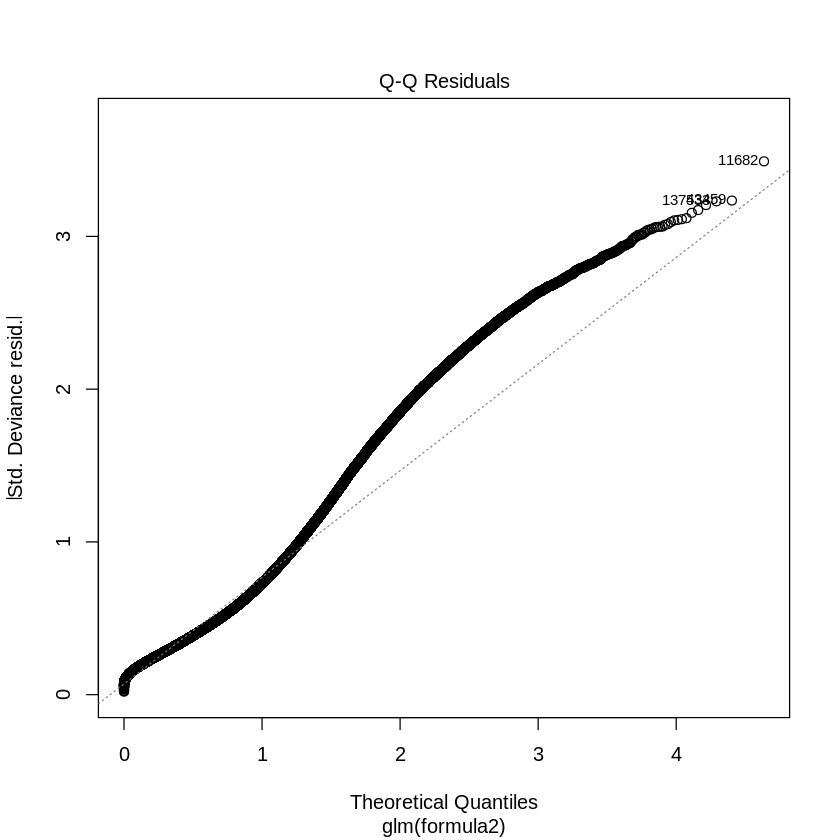

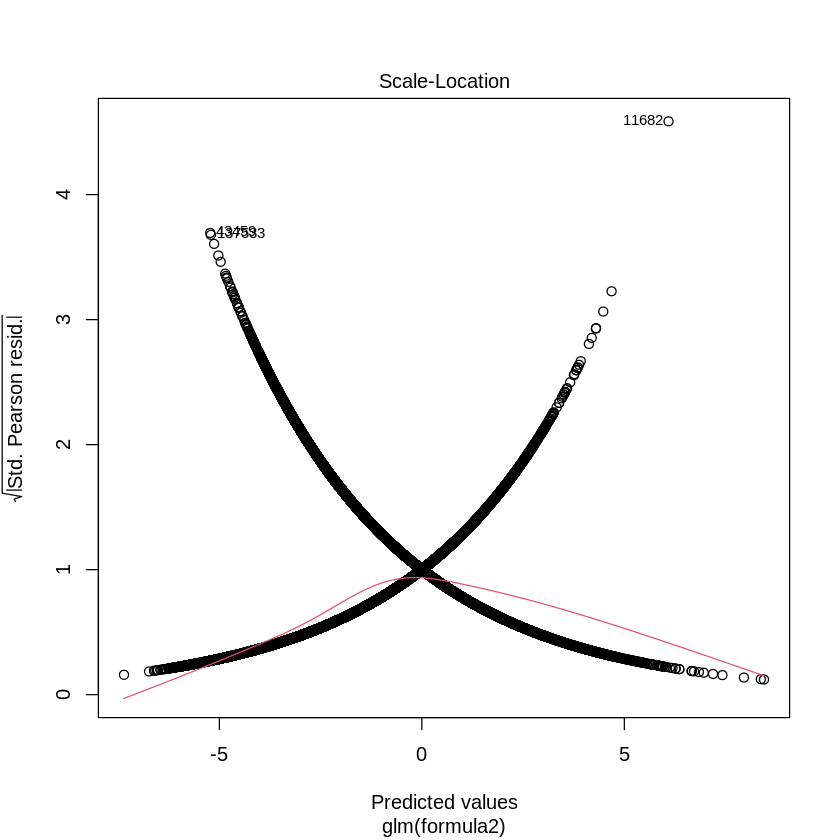

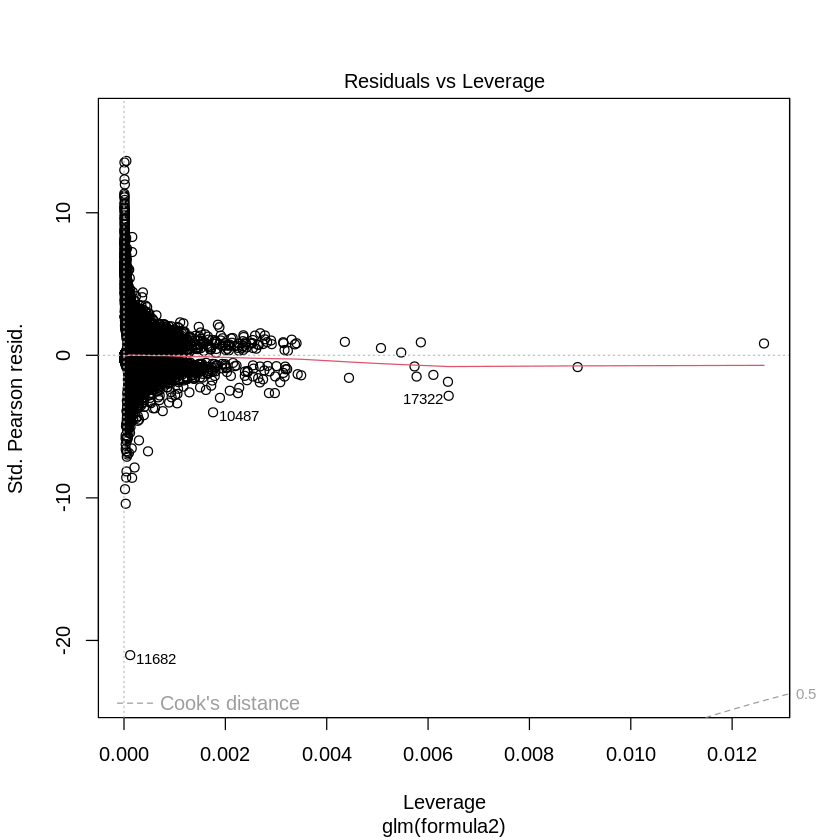

In [40]:
plot(model2)